# 1.1 El Método de *bisección*

[![Open In Colab](./imagenes/colab-badge.png)](https://colab.research.google.com/github/caramirezs/MetNum_librodigital/blob/master/1_Ecuaciones_de_una_variable/1.1_Metodo_biseccion.ipynb)

In [1]:
# EJECUTAR ESTA CELDA
# Librerias y Funciones iniciales
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def graficar(f, x_i, x_f, num=1000):
    """
    Gráfica de funciones algebraicas
    :param f: función, previamente definida
    :param x_i: límite inferior del intervalo
    :param x_f: límite superior del intervalo
    :param num: división del intervalo
    :return: figura y objeto de ejes para la gráfica de la función
    """
    sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
    # Crea un arreglo de valores x equiespaciados entre x_i y x_f con una longitud de num.
    x = np.linspace(x_i, x_f, num)
    # Crea una figura y un objeto de ejes (axis) utilizando matplotlib.
    # figsize se utiliza para establecer el tamaño de la figura.
    fig, ax = plt.subplots(figsize=(20,8))
    # Grafica la función f(x) en el objeto de ejes creado anteriormente.
    ax.plot(x, f(x))
    # Obtiene los límites inferior y superior de x y y de los ejes del objeto de ejes.
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    # label size de los ejes
    ax.tick_params(labelsize=20, axis='x')
    ax.tick_params(labelsize=20, axis='y')
    # Agrega flechas a los ejes x e y para indicar su dirección.
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    # Devuelve la figura y el objeto de ejes para que puedan ser manipulados y mostrados según se desee.
    return fig, ax

def met_biseccion(f, a, b, tol=1e-4, n=50, verbose=True):
    """
    Método de bisección para encontrar la solución de la ecuación f(x) = 0.
    :param f: Función previamente definida a la que se le intenta encontrar una solución.
    :param a: Límite inferior del intervalo.
    :param b: Límite superior del intervalo.
    :param tol: Tolerancia para el criterio de parada (por defecto, 1e-4).
    :param n: Número máximo de iteraciones para el criterio de parada (por defecto, 50).
    :param verbose: Si se debe imprimir información de la iteración en cada paso (por defecto, True).

    :return: Solución exacta o aproximada, si existe.
    """

    # Comprobar si el intervalo es válido para el método de bisección
    if not f(a) * f(b) < 0:
        print(f'El intervalo no funciona: f({a})={f(a):.2f}, f({b})={f(b):.2f}')
        return None

    # Inicializar variables
    i, p_0 = 1, a

    # Realizar iteraciones
    while i <= n:

        # Calcular punto medio
        p_i = (b + a) / 2
        e_abs = abs(p_0 - p_i)

        # Imprimir información
        if verbose:
            print(f'ite {i:<2}: a_{i - 1:<2} = {a:.4f}, b_{i - 1:<2} = {b:.4f}, p_{i:<2} = {p_i:.5f}'
                f' | e_abs: {e_abs:e}')

        # Si encontramos la solución exacta, retornarla
        if f(p_i) == 0:
            print(f'>>> Solución exacta encontrada después de {i} iteraciones: x->{p_i:.15f}')
            return p_i

        # Actualizar intervalo
        if f(a) * f(p_i) < 0:
            b = p_i
        else:
            a = p_i

        # Actualizar variables
        p_0 = p_i

        # Si la tolerancia se ha alcanzado, retornar solución
        if e_abs < tol:
            print(f'>>> Solución encontrada después de {i} iteraciones: x->{p_i:.15f}')
            return p_i

        # Incrementar contador
        i += 1

    print('solución no encontrada, iteraciones agotadas')
    return None

## Introducción

El método de bisección es un método numérico que nos permite encontrar una solución aproximada de una ecuación $f(x) = 0$, donde $f(x)$ es una función continua sobre un intervalo cerrado $[a, b]$, y $f(a)$ y $f(b)$ son de signos opuestos. La idea del método es dividir el intervalo en dos partes iguales y ver en cuál de ellas se encuentra la solución. Luego, se repite este proceso en la mitad del intervalo que contiene la solución hasta alcanzar una precisión deseada. Este método es fácil de implementar y converge lentamente pero con seguridad a la solución deseada. Es un método cerrado, lo que significa que siempre hay convergencia garantizada, a diferencia de los métodos abiertos como el método de Newton, el cual abordaremos más adelante.

En este método, el intervalo se divide en dos partes iguales y se calcula el valor de la función en el punto medio del intervalo. Si el valor de la función es cero, entonces el punto medio es la solución. De lo contrario, se verifica en qué mitad del intervalo se encuentra la solución y se repite el proceso en esa mitad del intervalo. Este proceso se repite hasta que se alcance la precisión deseada.

El método de bisección es útil para encontrar soluciones aproximadas de ecuaciones que no se pueden resolver analíticamente. Además, es un método robusto que siempre converge a la solución si se cumplen las condiciones iniciales adecuadas. Sin embargo, su convergencia es más lenta que otros métodos iterativos, por lo que se recomienda utilizarlo cuando se necesita una alta precisión y la función no es demasiado complicada.

## Condiciones
La idea detrás del método de bisección se puede expresar de la siguiente manera:

> Dada una función $f(x)$ continua sobre un intervalo $[a, b]$ donde $f(a) \cdot f(b) < 0$, la función tiene una raíz entre $[a, b]$.

Por el [Teorema del valor intermedio](https://es.wikipedia.org/wiki/Teorema_del_valor_intermedio) y el [Teorema de Bolzano](https://es.wikipedia.org/wiki/Teorema_de_Weierstrass) sabemos que: sí la function es continua sobre un intervalo cerrado $[a, b]$, $f(a)$ y $f(b)$ son de signos opuestos, esto implica que entre $a$ y $b$ existe al menos un $c$ tal que $f(c) = 0$.

El siguiente código ilustra la iteración del método de bisección para encontrar una solución de la ecuación $ e^x - 3 \sin(x) - 3x = 0$ en el intervalo $[0.5, 2]$. Los puntos `*`  en la gráfica de la función $f(x)$ indican cómo la sucesión se acerca a la solución de $f(x)=0$, la cual está representada por la intersección de la curva con el eje $x$.
(*Nota*: Puede modificar el código probando con otra función y modificando el intervalo, la tolerancia y el máximo número de iteraciones)

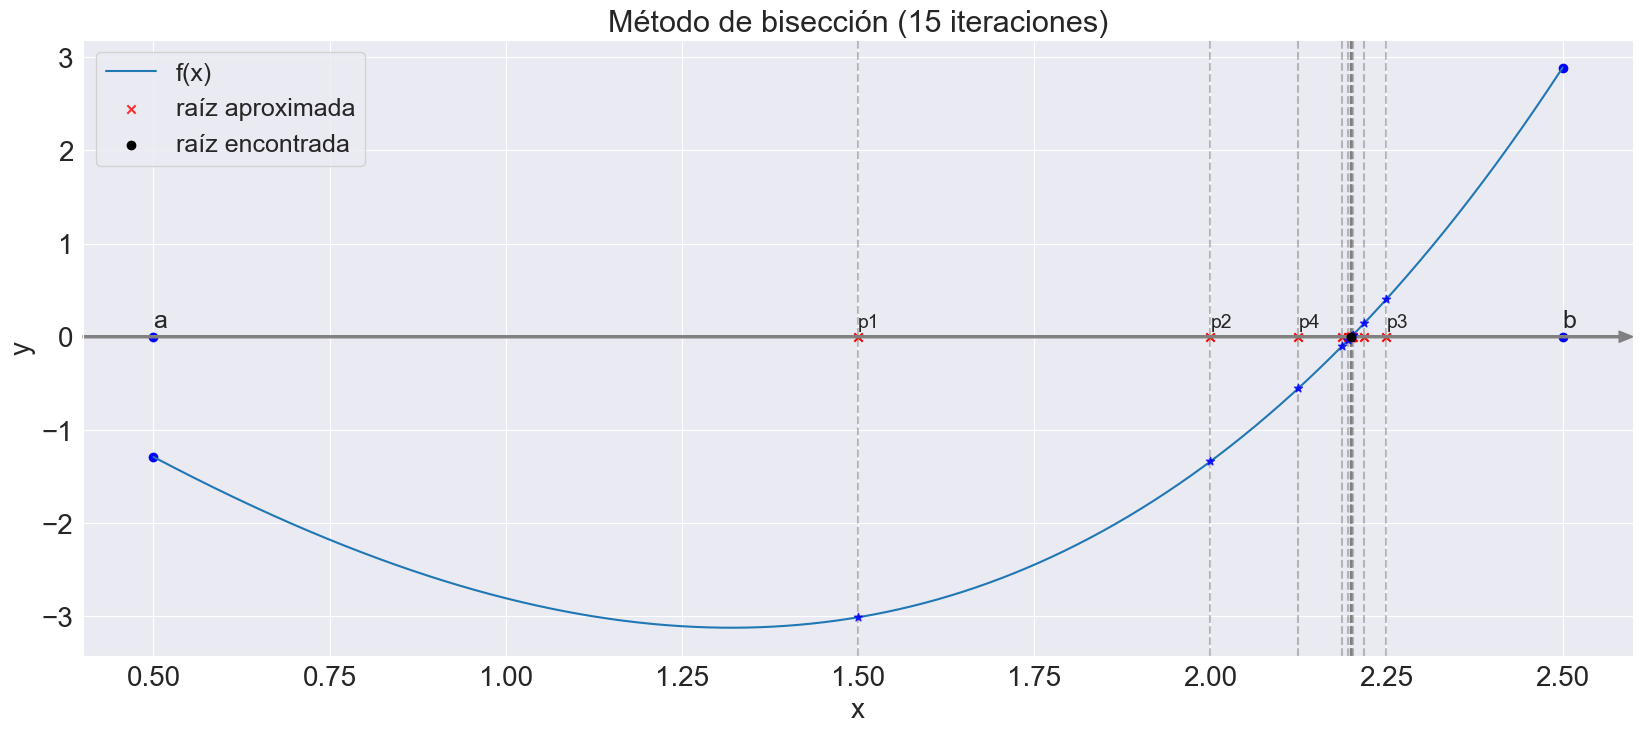

La secuencia para encontrar la solución fue: [1.5, 2.0, 2.25, 2.125, 2.1875, 2.2188, 2.2031, 2.1953, 2.1992, 2.2012, 2.2002, 2.1997, 2.2, 2.2001, 2.2]


In [2]:
# EJECUTAR ESTA CELDA
# Definir la función
f = lambda x: np.e**x - 3*np.sin(x) - 3*x

# Definir el intervalo, tolerancia y No. máximo de iteraciones
a, b = 0.5, 2.5
tolerancia = 1e-4
max_ite = 100

# Crea un arreglo de valores x equiespaciados entre x_i y x_f con una longitud de num.
x = np.linspace(a, b, 1000)
# Inicializar la lista de aproximaciones
lista_sol = list()


sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
# Crea una figura y un objeto de ejes (axis) utilizando matplotlib.
# figsize se utiliza para establecer el tamaño de la figura.
fig, ax = plt.subplots(figsize=(20, 8))
# Graficar la función
ax.plot(x, f(x), label='f(x)')
ax.scatter([a, a, b, b], [f(a), 0, f(b), 0], color='blue')
plt.text(a, 0.1, f"a", fontsize=18)
plt.text(b, 0.1, f"b", fontsize=18)

# Iterar hasta que la tolerancia sea alcanzada o se supere el número máximo de iteraciones
ite = 1
while ite <= max_ite:
    # Calcular el punto medio del intervalo
    p_i = (a + b) / 2
    # Agregar c a la lista de aproximaciones
    lista_sol.append(round(p_i,4))

    # Graficar la línea vertical en p_i y el punto en la grafica
    ax.axvline(x=p_i, linestyle='--', color='gray', alpha=0.5, zorder=2)
    ax.scatter(p_i, f(p_i), color='blue', alpha=0.8, marker='*', zorder=3)
    ax.scatter(p_i, 0, color='red', alpha=1, marker='x', zorder=2)
    # texto
    if ite <= 4:
        plt.text(p_i, 0.1, f"p{ite}", fontsize=14)
    # Actualizar el intervalo
    if f(p_i) == 0:
        break
    elif f(a)*f(p_i) < 0:
        b = p_i
    else:
        a = p_i

    if abs(b-a) < tolerancia:
        break

    ite += 1

# Graficar el punto final encontrado
ax.scatter(p_i, 0, color='red', alpha=0.8, marker='x', label='raíz aproximada')
ax.scatter(p_i, f(p_i), color='black', label='raíz encontrada', zorder=3)

### EJES ###
# Obtiene los límites inferior y superior de x y y de los ejes del objeto de ejes.
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
# label size de los ejes
ax.tick_params(labelsize=20, axis='x')
ax.tick_params(labelsize=20, axis='y')
# Agrega flechas a los ejes x e y para indicar su dirección.
ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10), zorder=2)
ax.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10), zorder=2)

# Configurar la gráfica
plt.legend(fontsize=18)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title(f'Método de bisección ({ite} iteraciones)', fontsize=22)
plt.show()
print(f'La secuencia para encontrar la solución fue: {lista_sol}')

## Fórmula
Como se dijo anteriormente, el algoritmo busca el *punto medio* del intervalo seleccionado, por tanto, en el n-ésimo intervalo, si $a_n$ y $b_n$ son los extremos del intervalo, la fórmula de la siguiente aproximación es:
$$p_{n+1} = \dfrac{a_n + b_n}{2}$$

## Método de bisección paso a paso:

**Paso 1**: Seleccionar un intervalo $[a, b]$ que encierre la raíz y verifique que la función cambie de signo en el intervalo mediante $f(a) \cdot f(b) < 0$.

**Paso 2**: Calcular el punto medio $p_n$ del intervalo mediante $p_n = \frac{a + b}{2}$.

**Paso 3**: Comprobar si $f(p_n) = 0$ o si $p_n$ cumple con la tolerancia deseada ($e_a = |b-a|$); si es así, el método finaliza, de lo contrario continúa.

**Paso 4**: Determinar en qué subintervalo está la raíz mediante las siguientes evaluaciones:

* Si $f(p_n) \cdot f(a) < 0$, entonces la raíz está en el subintervalo derecho $[p_n, b]$. Por lo tanto, se actualiza $a = p_n$, se mantiene $b$ y se vuelve al paso 2.
* Si $f(p_n) \cdot f(b) > 0$, entonces la raíz está en el subintervalo izquierdo $[a, p_n]$. Por lo tanto, se actualiza $b = p_n, se mantiene $a$ y se vuelve al paso 2.

Serepiten los pasos 2 al 4 hasta alcanzar una tolerancia de error deseada o hasta que se agoten el número de iteraciones permitido.

## Ejemplos
### Ejemplo práctico 1: Resolución de Ecuación no Lineal mediante el método de Bisección

Se desea resolver la ecuación $e^x - \sin(x) = 3x^2$ con una tolerancia de $10^{-5}$ en el intervalo $[0, 2]$.

**Datos**:

- $f(x) = e^x - \sin(x) - 3x^2$ (se reorganiza la ecuación para que quede igualada a cero: $f(x)=0$)
- Intervalo inicial: $a=0$, $b=2$
- Tolerancia: $10^{-5}$

**Procedimiento**:
1. Es recomendable graficar la función antes de realizar el cálculo
2. Se halla el punto medio del intervalo: $m = \frac{a + b}{2}$
3. Se evalúa la función en los puntos $a$, $b$, y $m$
4. Se determina el nuevo intervalo, reemplazando $a$ o $b$ por $m$
5. Se calcula el error: $E_a = |b - a|$, y se compara con la tolerancia. Si $tolerancia < error$, el algoritmo continúa desde el paso 2. De lo contrario, el algoritmo se detiene.

*Nota*: El primer paso se puede realizar con la función `graficar()`. El procedimiento de los Pasos del 2 al 5 se realiza mediante la función `met_biseccion()`.


(<Figure size 2000x800 with 1 Axes>, <Axes: >)

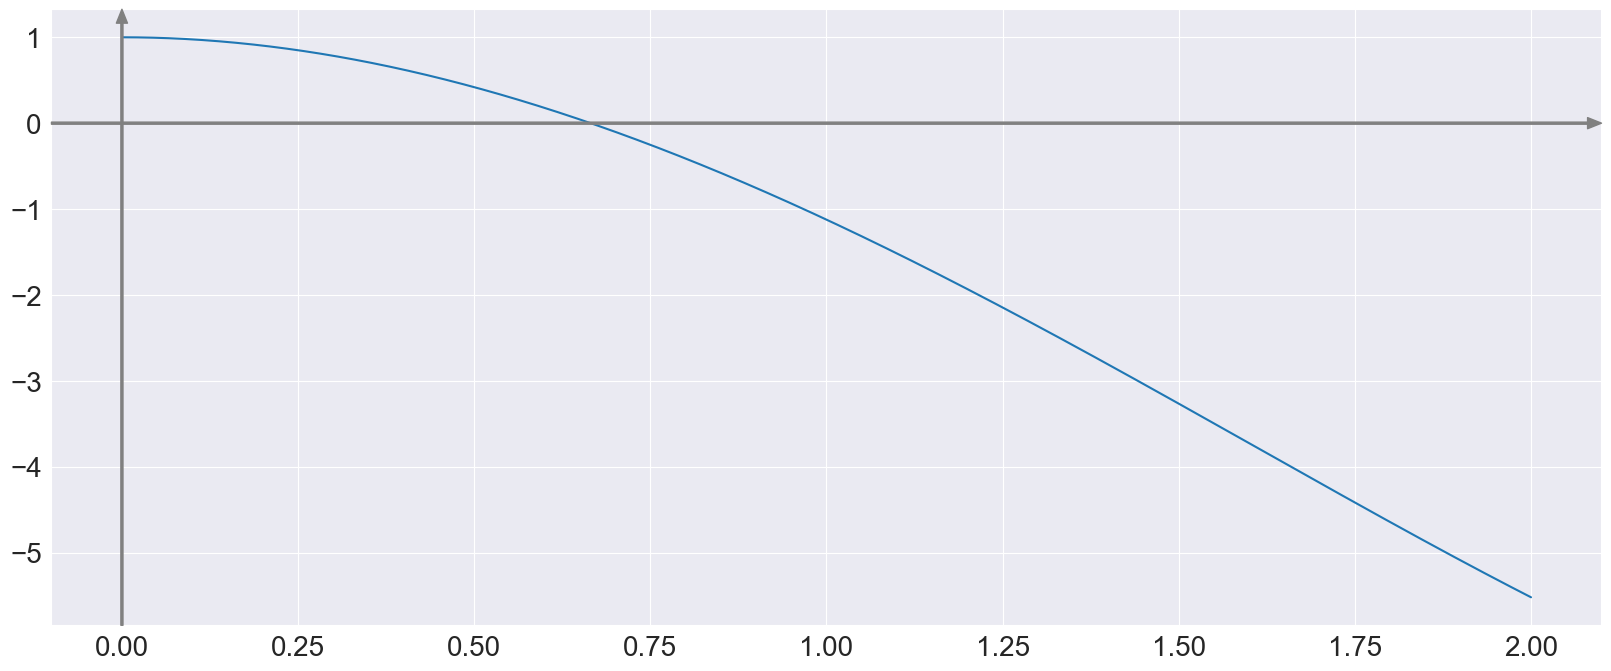

In [3]:
# Grafica de la función f(x), se observa que es continua y que cambia de signo.
f = lambda x: np.e**x - np.sin(x) - 3*x**2
graficar(f, 0, 2)

Analizando la gráfica se puede observar que corta al $eje-x$ cuando $x \approx 0.65$, es decir $f(0.65) \approx 0$. Como se dijo anteriormente, esto es una imprecisa aproximación que no cumple con la tolerancia solicitada y se debe mejorar.

Ahora se puede ejecutar el método y comprobar la solución encontrada con el análisis gráfico:

In [4]:
met_biseccion(f, 0, 2, tol=1e-5)

ite 1 : a_0  = 0.0000, b_0  = 2.0000, p_1  = 1.00000 | e_abs: 1.000000e+00
ite 2 : a_1  = 0.0000, b_1  = 1.0000, p_2  = 0.50000 | e_abs: 5.000000e-01
ite 3 : a_2  = 0.5000, b_2  = 1.0000, p_3  = 0.75000 | e_abs: 2.500000e-01
ite 4 : a_3  = 0.5000, b_3  = 0.7500, p_4  = 0.62500 | e_abs: 1.250000e-01
ite 5 : a_4  = 0.6250, b_4  = 0.7500, p_5  = 0.68750 | e_abs: 6.250000e-02
ite 6 : a_5  = 0.6250, b_5  = 0.6875, p_6  = 0.65625 | e_abs: 3.125000e-02
ite 7 : a_6  = 0.6562, b_6  = 0.6875, p_7  = 0.67188 | e_abs: 1.562500e-02
ite 8 : a_7  = 0.6562, b_7  = 0.6719, p_8  = 0.66406 | e_abs: 7.812500e-03
ite 9 : a_8  = 0.6641, b_8  = 0.6719, p_9  = 0.66797 | e_abs: 3.906250e-03
ite 10: a_9  = 0.6641, b_9  = 0.6680, p_10 = 0.66602 | e_abs: 1.953125e-03
ite 11: a_10 = 0.6641, b_10 = 0.6660, p_11 = 0.66504 | e_abs: 9.765625e-04
ite 12: a_11 = 0.6650, b_11 = 0.6660, p_12 = 0.66553 | e_abs: 4.882812e-04
ite 13: a_12 = 0.6650, b_12 = 0.6655, p_13 = 0.66528 | e_abs: 2.441406e-04
ite 14: a_13 = 0.6650, b_

0.6652603149414062

La solución de $e^x - \sin(x) = 3x^2$ es $x \approx 0.66526$.

### Ejemplo 2
Se desea encontrar la solución de la ecuación $x^3 + 2x - 5 = 0$ con una tolerancia de $10^{-5}$ en el intervalo $[1, 2]$.

**Datos**:

$f(x) = x^3 + 2x - 5$

$a = 1$, $b = 2$

tolerancia = $10^{-5}$

**Procedimiento**:
*Paso 1*: $[a,b] = [1, 2]$

*Paso 2*: Hallar punto medio $m = \frac{a + b}{2} = 1.5$

*Paso 3*: Evaluar la función $f(a)$, $f(b)$, $f(m)$

$f(1) = -2$, $f(2) = 5$ , $f(1.5) = 1.375$

*Paso 4*: Determinar el nuevo intervalo, $m$ reemplaza el valor de $a$ o de $b$. En este caso, como $f(a)f(m) < 0$, entonces el nuevo intervalo será $[1, 1.5]$

*Paso 5*: Calcular el error $E_a = |b - a| = 0.5$ y compararlo con la tolerancia. Como $0.5 > 10^{-4}$, se debe repetir el procedimiento desde el Paso 2.

**Segunda iteración**:
Paso 2: Hallar punto medio $m = \frac{a + b}{2} = 1.25$

Paso 3: Evaluar la función $f(a)$, $f(b)$, $f(m)$

$f(1) = -2$, $f(1.5) = 1.375$ , $f(1.25) = -0.859375$

*Paso 4*: Determinar el nuevo intervalo, $m$ reemplaza el valor de $a$ o de $b$. En este caso, como $f(a)f(m) < 0$, entonces el nuevo intervalo será $[1.25, 1.5]$

*Paso 5*: Calcular el error $error = |b - a| = 0.25$ y compararlo con la tolerancia. Como $0.25 > 10^{-4}$, se debe repetir el procedimiento desde el Paso 2.

El proceso debe continuar hasta llegar a la tolerancia deseada.

A continuación se muestra la representación gráfica de la función y luego se ejecuta la función `met_biseccion(f, 1, 2, tol=1e-4)` para determinar la solución deseada

(<Figure size 2000x800 with 1 Axes>, <Axes: >)

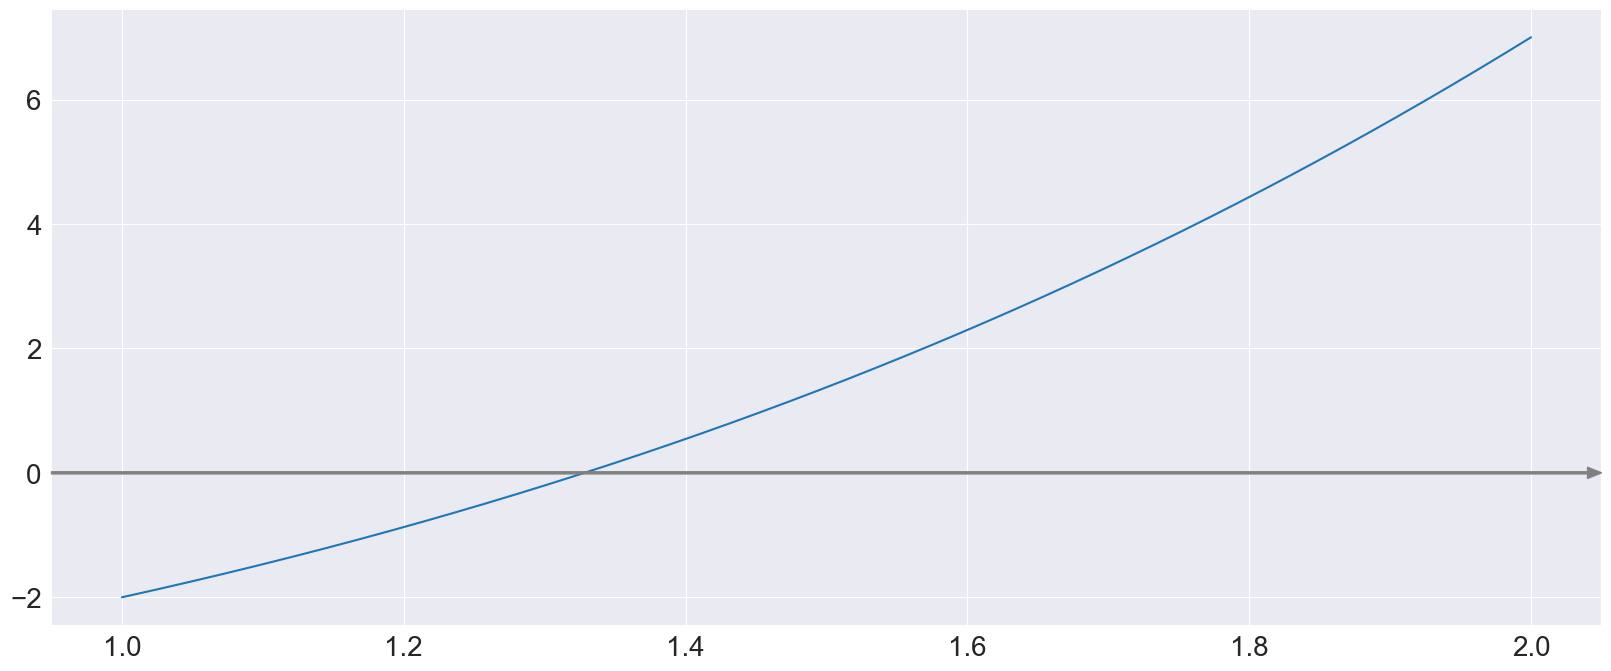

In [5]:
f = lambda x: x**3 + 2*x - 5
# Función que grafica
graficar(f, 1, 2)

In [6]:

met_biseccion(f, 1, 2, tol=1e-5)

ite 1 : a_0  = 1.0000, b_0  = 2.0000, p_1  = 1.50000 | e_abs: 5.000000e-01
ite 2 : a_1  = 1.0000, b_1  = 1.5000, p_2  = 1.25000 | e_abs: 2.500000e-01
ite 3 : a_2  = 1.2500, b_2  = 1.5000, p_3  = 1.37500 | e_abs: 1.250000e-01
ite 4 : a_3  = 1.2500, b_3  = 1.3750, p_4  = 1.31250 | e_abs: 6.250000e-02
ite 5 : a_4  = 1.3125, b_4  = 1.3750, p_5  = 1.34375 | e_abs: 3.125000e-02
ite 6 : a_5  = 1.3125, b_5  = 1.3438, p_6  = 1.32812 | e_abs: 1.562500e-02
ite 7 : a_6  = 1.3281, b_6  = 1.3438, p_7  = 1.33594 | e_abs: 7.812500e-03
ite 8 : a_7  = 1.3281, b_7  = 1.3359, p_8  = 1.33203 | e_abs: 3.906250e-03
ite 9 : a_8  = 1.3281, b_8  = 1.3320, p_9  = 1.33008 | e_abs: 1.953125e-03
ite 10: a_9  = 1.3281, b_9  = 1.3301, p_10 = 1.32910 | e_abs: 9.765625e-04
ite 11: a_10 = 1.3281, b_10 = 1.3291, p_11 = 1.32861 | e_abs: 4.882812e-04
ite 12: a_11 = 1.3281, b_11 = 1.3286, p_12 = 1.32837 | e_abs: 2.441406e-04
ite 13: a_12 = 1.3281, b_12 = 1.3284, p_13 = 1.32825 | e_abs: 1.220703e-04
ite 14: a_13 = 1.3282, b_

1.3282699584960938

Después de 17 iteraciones se encuentra la solución $x \approx 1.32826$ para la ecuación $x^3 + 2x - 5 = 0$

## Estimación del error en el método de bisección

Para estimar el error de este método tenemos que tener en cuenta que a medida que aumentan las iteraciones, el intervalo se reduce a la mitad y la solución real está en algún valor dentro del intervalo. Por tanto, el error verdadero entre nuestra solución $p_n$ y la solución verdadera $p$ será menor que la longitud del intervalo de la iteración n-ésima. Así, cunaso se terminó el ejemplo 2 podemos afirmar que la solución es $p=1.328269958 \pm 7.6 \cdot 10^{-6}$. En otras palabras, la solución aproximada que encontramos es idéntica a la solución exacta *al menos* hasta 5 cifras decimales.

La estimación del error en el Método de Bisección se realiza mediante la fórmula del error absoluto en cada iteración. Esta fórmula se expresa como:

$|x_{n+1}-x_n| \leq \frac{b-a}{2^{n+1}}$

donde $x_n$ y $x_{n+1}$ son las aproximaciones de la raíz en las n-ésima e (n+1)-ésima iteración, respectivamente; a y b son los extremos del intervalo original; y n es el número de iteraciones realizadas.

Esta fórmula muestra que el error absoluto en cada iteración disminuye a la mitad en comparación con la iteración anterior. Es decir, el error se reduce exponencialmente con el número de iteraciones. Por lo tanto, si se desea una precisión de ε, se puede calcular el número mínimo de iteraciones necesarias para alcanzar esa precisión mediante la siguiente fórmula:

$n \geq \frac{\log{(b-a)}-\log{ε}}{\log{2}}$

donde ε es la precisión deseada.

Es importante tener en cuenta que la fórmula del error absoluto en el Método de Bisección proporciona una estimación del error máximo posible en cada iteración. Por lo tanto, puede haber casos en los que el error real sea mucho menor que el error estimado. En estos casos, se puede detener el proceso de iteración antes de alcanzar la precisión deseada para ahorrar tiempo de cálculo.

## Conclusiones
El Método de bisección es un método numérico eficiente y confiable para encontrar la solución de ecuaciones no lineales. Su convergencia está garantizada siempre y cuando la función sea continua y tenga un cambio de signo en el intervalo inicial. Además, la fórmula del error absoluto en cada iteración permite estimar el error máximo posible en cada paso y determinar el número mínimo de iteraciones necesarias para alcanzar la precisión deseada.

Sin embargo, el método de bisección tiene algunas limitaciones. En primer lugar, puede ser un método lento en comparación con otros métodos numéricos más avanzados. Esto se debe a que divide repetidamente el intervalo en dos partes iguales y selecciona el subintervalo que contiene la raíz de la ecuación. Además, el Método de Bisección solo se puede aplicar para encontrar una sola raíz en un intervalo específico, lo que lo hace menos útil en casos donde hay múltiples raíces en el mismo intervalo.

## Ejercicios

1. Encuentra la solución de la ecuación $-3x^3 - 5x = 2$ en el intervalo $[1, 2]$ con una precisión de $10^{-4}$.
2. Encuentra la raíz de la función $f(x) = e^x - \cos(x)$ en el intervalo $[0, 1]$ con una precisión de $10^{-5}$.
3. Encuentra la solución de la ecuación $\sqrt{x} = \ln(x)$ en el intervalo $[1, 2]$ con una precisión de $10^{-4}$.
4. ¿Cuántas iteraciones se necesitan para encontrar una solución a la ecuación $\cos(x) = x^2$ en el intervalo $[0, 1]$ con una presición de $10^{-6}$?, ¿cuál es la solución?

### Aplicación
Un ingeniero está diseñando un sistema de tuberías para transportar agua a través de un terreno. La tubería principal tiene una longitud de 1000 metros y un diámetro desconocido. El ingeniero necesita determinar el diámetro de la tubería para que la velocidad del agua no exceda los 2 m/s y el caudal máximo sea de 200 litros por segundo. La fórmula que relaciona el diámetro de la tubería (en metros), la velocidad del agua (en metros por segundo) y el caudal máximo (en litros por segundo) es:
$$q = 1000 v \pi  d^2 / 4$$
donde q es el caudal máximo en litros por segundo, v es la velocidad máxima del agua en metros por segundo, y d es el diámetro de la tubería en metros.

Determine el diámetro mínimo de la tubería que cumple con los requisitos del ingeniero. Por experiencia, él sabe que el diámetro puede estar entre $[0.1, 1.0]$ metros.

In [8]:
Ve, m0, q, g = 11200, 2800000, 13300, 9.81
v = Ve
f = lambda t: (Ve * np.log(m0 / (m0 - q*t))) -g*t - v
met_biseccion(f, 0, 200)

ite 1 : a_0  = 0.0000, b_0  = 200.0000, p_1  = 100.00000 | e_abs: 1.000000e+02
ite 2 : a_1  = 100.0000, b_1  = 200.0000, p_2  = 150.00000 | e_abs: 5.000000e+01
ite 3 : a_2  = 100.0000, b_2  = 150.0000, p_3  = 125.00000 | e_abs: 2.500000e+01
ite 4 : a_3  = 125.0000, b_3  = 150.0000, p_4  = 137.50000 | e_abs: 1.250000e+01
ite 5 : a_4  = 137.5000, b_4  = 150.0000, p_5  = 143.75000 | e_abs: 6.250000e+00
ite 6 : a_5  = 137.5000, b_5  = 143.7500, p_6  = 140.62500 | e_abs: 3.125000e+00
ite 7 : a_6  = 140.6250, b_6  = 143.7500, p_7  = 142.18750 | e_abs: 1.562500e+00
ite 8 : a_7  = 140.6250, b_7  = 142.1875, p_8  = 141.40625 | e_abs: 7.812500e-01
ite 9 : a_8  = 141.4062, b_8  = 142.1875, p_9  = 141.79688 | e_abs: 3.906250e-01
ite 10: a_9  = 141.7969, b_9  = 142.1875, p_10 = 141.99219 | e_abs: 1.953125e-01
ite 11: a_10 = 141.9922, b_10 = 142.1875, p_11 = 142.08984 | e_abs: 9.765625e-02
ite 12: a_11 = 142.0898, b_11 = 142.1875, p_12 = 142.13867 | e_abs: 4.882812e-02
ite 13: a_12 = 142.1387, b_12 

142.14448928833008